In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

from phd import viz
import sys
import os
import traceback

colors, swatches = viz.phd_style(jupyterStyle=True, grid=True)
%config InlineBackend.figure_formats = ['svg']

# 8 nm filter dataset August Latest

In [2]:
chA_list_str = ['35: 1549.32 nm',
               '36: 1548.51 nm',
               '37: 1547.72 nm',
               '38: 1546.92 nm',
               '39: 1546.12 nm',
               '40: 1545.32 nm',
               '41: 1544.53 nm',
               '42: 1543.73 nm']
chB_list_str = ['52: 1535.82 nm',
                '53: 1535.04 nm',
                '54: 1534.25 nm',
                '55: 1533.47 nm',
                '56: 1532.68 nm',
                '57: 1531.90 nm',
                '58: 1531.12 nm',
                '59: 1530.33 nm']

In [12]:
data_set = {}
chA_list = [35,36,37,38,39,40,41,42]
chB_list = [52,53,54,55,56,57,58,59]
for chA in chA_list:
    data_set[chA] = {}
    path = "."
    for chB in chB_list:
        try:
            with open(os.path.join(path, f"ent_data_ch{chA}_{chB}.json"), 'r') as file:
                data = json.load(file)
                data_set[chA][chB] = data
        except:
#             traceback.print_exc()
            data = {}
            data_set[chA][chB] = data

In [5]:
import os
os.listdir(".") # returns list

['.ipynb_checkpoints',
 'ent_data_ch35_57.json',
 'ent_data_ch35_58.json',
 'ent_data_ch35_59.json',
 'ent_data_ch36_56.json',
 'ent_data_ch36_57.json',
 'ent_data_ch36_58.json',
 'ent_data_ch36_59.json',
 'ent_data_ch37_55.json',
 'ent_data_ch37_56.json',
 'ent_data_ch37_57.json',
 'ent_data_ch37_58.json',
 'ent_data_ch37_59.json',
 'ent_data_ch38_54.json',
 'ent_data_ch38_55.json',
 'ent_data_ch38_56.json',
 'ent_data_ch38_57.json',
 'ent_data_ch38_58.json',
 'ent_data_ch39_53.json',
 'ent_data_ch39_54.json',
 'ent_data_ch39_55.json',
 'ent_data_ch39_56.json',
 'ent_data_ch39_57.json',
 'ent_data_ch40_52.json',
 'ent_data_ch40_53.json',
 'ent_data_ch40_54.json',
 'ent_data_ch40_55.json',
 'ent_data_ch41_52.json',
 'ent_data_ch41_53.json',
 'ent_data_ch41_54.json',
 'ent_data_ch41_55.json',
 'ent_data_ch42_52.json',
 'ent_data_ch42_53.json',
 'ent_data_ch42_54.json',
 'jsi_plot.ipynb']

dict_keys([52, 53, 54, 55, 56, 57, 58, 59])


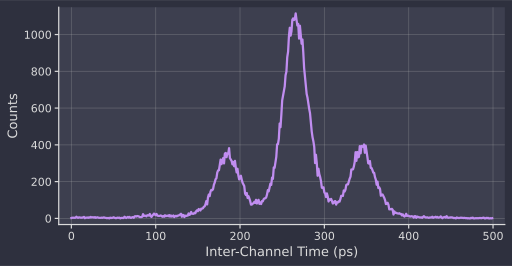

In [15]:
viz.update_colors(dark=True)
# viz.update_colors()
print(data_set[35].keys())
st = data_set[37][57]
# print(st)
fig, ax = plt.subplots(figsize= (8,4))
ax.plot(st["hist_data_index"],st["hist_data"])
sum(st["hist_data"])
start = 405
end = 400
sum(st["hist_data"])


for chA in chA_list:
    for chB in chB_list:
        try:
            st = data_set[chA][chB]
            data_set[chA][chB]["coinc"] = sum(st["hist_data"])
        except:
            data_set[chA][chB]["coinc"] = 0
            
# ax.set_xlim(800, 1300)
ax.set_xlabel("Inter-Channel Time (ps)")
ax.set_ylabel("Counts")
# plt.title("")

# viz.update_colors()
# plt.savefig("histogram_counts_after_intf_light.svg")
# viz.update_colors(dark=True)
# fig.set_facecolor("black")
plt.savefig("histogram_counts_after_intf_dark_test.svg")

In [6]:
plt.show()

In [16]:
Set = []
Set_names = []
for i, chB in enumerate(chB_list):
    Set.append([])
    
    for j, chA in enumerate(chA_list):
        try: 
            coinc = data_set[chA][chB]["coinc"]

            Set[i].append(coinc)
        except:
            Set[i].append('∅')

In [8]:
# import matplotlib
# matplotlib.rcParams.keys()

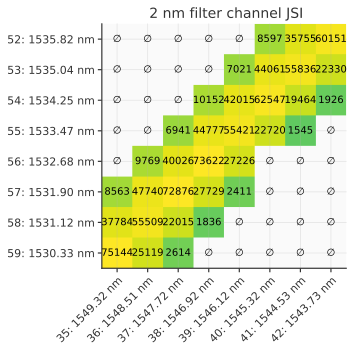

In [17]:
import matplotlib.colors as colors
viz.update_colors()

# chA_list_str = []
# chB_list_str = []
# for i in range(len(chA_list)):
#     chA_list_str.append(str(chA_list[i]))
# for i in range(len(chB_list)):
#     chB_list_str.append(str(chB_list[i]))

# fig, ax = plt.subplots(1,1, figsize=(5,5))
# ax.set_xticklabels([str(i) for i in chB_list])
# ax.set_yticklabels([str(i) for i in chA_list])
# extent = [chB_list[0]-0.5,chB_list[-1]+0.5, chA_list[-1]+0.5, chA_list[0]-0.5]

fig, ax = plt.subplots(1,1,figsize = (5,5))
Set = np.array(Set)
im = ax.imshow(Set,norm=colors.LogNorm(vmin=.01, vmax=np.max(Set)))

ax.set_xticks(np.arange(len(chA_list)))
ax.set_yticks(np.arange(len(chB_list)))
ax.set_xticklabels(chA_list_str)
ax.set_yticklabels(chB_list_str)


# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(chA_list)):
    for j in range(len(chB_list)):
        if Set[i][j] == 0:
            label = '∅'
        else:
            label = Set[i][j]
        text = ax.text(j, i, label,
                       ha="center", va="center", 
                       color="black")
ax.set_title(" 2 nm filter channel JSI")

fig.tight_layout()
plt.savefig("2nm_jsi_light.svg")
plt.show()


<BarContainer object of 8 artists>

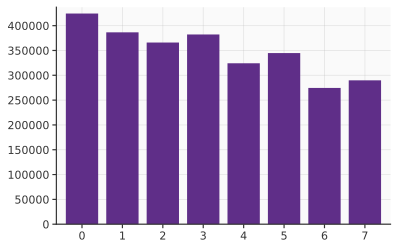

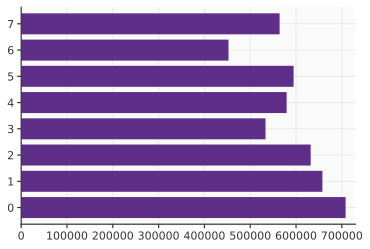

In [18]:
chA_raw = []
for chA in chA_list:
    counts = []
    for chB in chB_list:
        try:
            counts.append(data_set[chA][chB]['count_data'][0])
        except:
            pass
    chA_raw.append(np.average(np.array(counts)))
# print(chA_raw)

# print("################################################")
# print("################################################")
chB_raw = []
for chB in chB_list:
    counts = []
    for chA in chA_list:
        try:
            counts.append(data_set[chA][chB]['count_data'][1])
        except:
            pass
#     print(counts)
    chB_raw.append(np.average(np.array(counts)))
chB_raw = np.array(chB_raw)
chA_raw = np.array(chA_raw)
plt.figure()
plt.bar(np.arange(len(chA_raw)), chA_raw)
plt.figure()
plt.barh(np.arange(len(chB_raw)), chB_raw)

Text(0.5, 0.98, 'Counts 8nm JSI')

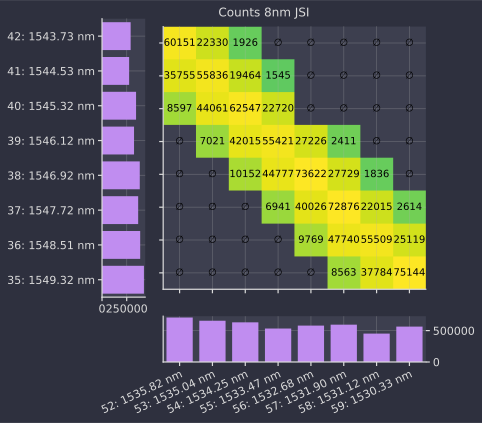

In [19]:
viz.update_colors(dark=True)

fig = plt.figure(figsize = (5,5.3))

b1 = 0.05
b2 = 0.05
tw = 0.12
width = 1 - 2*b1 - b2 - tw

main_size = [b1 + b2 + tw, b1 + b2 + tw, width, width]
left_bar = [b1, b1 + tw + b2, tw, width]
bottom_bar = [b1 + tw + b2, b1, width, tw]


ax_left_bar = fig.add_axes(left_bar)
ax_bottom_bar = fig.add_axes(bottom_bar)
ax_main = fig.add_axes(main_size, sharex=ax_bottom_bar, sharey=ax_left_bar)
# setp(ax_main, xticklabels=[])
# ax_bottom_bar.set_xscale('log')
# ax_bottom_bar.grid(which='minor')
# ax_main.grid(which='minor')
ax_main.tick_params('x', labelbottom=False)
ax_main.tick_params('y', labelleft=False)


ax_left_bar.set_yticks(np.arange(len(chA_list)))
ax_bottom_bar.set_xticks(np.arange(len(chB_list)))

ax_left_bar.set_yticklabels(chA_list_str[::-1])
ax_bottom_bar.set_xticklabels(chB_list_str)
plt.setp(ax_bottom_bar.get_xticklabels(), rotation=25, ha="right",
         rotation_mode="anchor")
ax_left_bar.barh(np.arange(len(chA_raw)), chA_raw[::-1])
ax_bottom_bar.bar(np.arange(len(chB_raw)), chB_raw)
ax_bottom_bar.yaxis.tick_right()

Set_rot = np.rot90(np.array(Set))
ax_main.imshow(Set_rot,norm=colors.LogNorm(vmin=.01, vmax=np.max(Set)))

for i in range(len(chA_list)):
    for j in range(len(chB_list)):
        if Set_rot[i][j] == 0:
            label = '∅'
        else:
            label = Set_rot[i][j]
        text = ax_main.text(j, i, label,
                       ha="center", va="center", 
                       color="black")
fig.suptitle('Counts 8nm JSI')
# plt.savefig("2nm_jsi_dark.svg")

### useful for annotated heatmaps: https://matplotlib.org/3.5.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

# 8 nm filter dataset

In [12]:
chA_list = [35,36,37,38,39,40,41,42]
chB_list = [52,53,54,55,56,57,58,59]

data_set = {}

for chA in chA_list:
    data_set[chA] = {}
    path = "./8_nm_filter_JSI"
    for chB in chB_list:
        try:
            with open(os.path.join(path, f"ent_data_ch{chA}_{chB}.json"), 'r') as file:
                data = json.load(file)
                data_set[chA][chB] = data
        except:
#             traceback.print_exc()
            data = {}
            data_set[chA][chB] = data

dict_keys([35, 36, 37, 38, 39, 40, 41, 42])
dict_keys([52, 53, 54, 55, 56, 57, 58, 59])


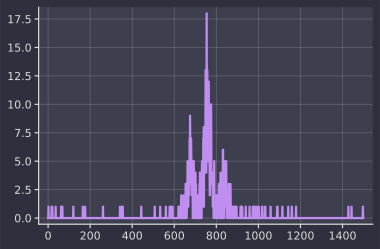

In [13]:
print(data_set.keys())

print(data_set[42].keys())
st = data_set[42][52]


# print(st)
plt.plot(st["hist_data_index"],st["hist_data"])
sum(st["hist_data"][750:1250])
# start = 750//2
# end = 1250//2
sum(st["hist_data"])


for chA in chA_list:
    for chB in chB_list:
        try:
            st = data_set[chA][chB]
#             print(st)
            if chB == 52 and (chA == 42 or chA == 41 or chA == 40 or chA == 39):
                    data_set[chA][chB]["coinc"] = sum(st["hist_data"])
            else:
                data_set[chA][chB]["coinc"] = sum(st["hist_data"])/3
        except:
            data_set[chA][chB]["coinc"] = 0

In [14]:
data_set[36][56]

{'coinc': 0}

In [15]:
data_set[36][56]["coinc"] = 9700 # I wrote this down manually, but it looks like the data I saved got lost

In [16]:

print(chA_list)
print(chB_list)
Set = []
Set_names = []

print(data_set[35][56]["coinc"])


for i, chB in enumerate(chB_list):
    ls = []
    
    for j, chA in enumerate(chA_list):
        try: 
            coinc = round(data_set[chA][chB]["coinc"])
#             print(f"coinc for {chA} and {chB} is {coinc}")
            ls.append(coinc)
#             print
        except:
            traceback.print_exc()
            print("none")
            ls.append(0)
#     print(ls)
    Set.append(ls)

[35, 36, 37, 38, 39, 40, 41, 42]
[52, 53, 54, 55, 56, 57, 58, 59]
89.66666666666667


In [17]:
Set

[[0, 0, 0, 231, 2562, 9677, 5488, 706],
 [0, 0, 0, 2729, 8401, 6579, 571, 0],
 [0, 0, 2615, 12406, 7489, 953, 0, 0],
 [0, 3172, 8496, 8153, 921, 0, 0, 0],
 [90, 9700, 5736, 899, 0, 0, 0, 0],
 [272, 5624, 659, 0, 0, 0, 0, 0],
 [292, 884, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

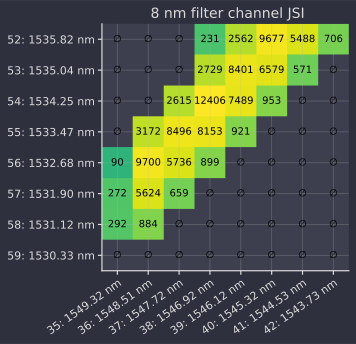

In [18]:
import matplotlib.colors as colors
Set = np.array(Set)

fig, ax = plt.subplots(1,1,figsize = (5,5))
im = ax.imshow(Set,norm=colors.LogNorm(vmin=.01, vmax=np.max(Set)))

ax.set_xticks(np.arange(len(chA_list)))
ax.set_yticks(np.arange(len(chB_list)))
ax.set_xticklabels(chA_list_str)
ax.set_yticklabels(chB_list_str)


# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=35, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(chA_list)):
    for j in range(len(chB_list)):
        if Set[i][j] == 0:
            label = '∅'
        else:
            label = Set[i][j]
        text = ax.text(j, i, label,
                       ha="center", va="center", 
                       color="black")
ax.set_title(" 8 nm filter channel JSI")

fig.tight_layout()
plt.show()

[8230.347343423307, 190185.99440068952, 149877.4796433808, 198336.39737196555, 168043.46817551332, 182830.61158004586, 136133.78293364737, 141800.5743310216]
################################################
################################################
[259409.20455405646, 257707.34841574897, 256524.4462672498, 254421.41758684992, 252735.1829774452]
[234925.46845409818, 236148.02036512477, 236129.65963328976, 235986.6505072374]
[275055.12658420875, 275384.0097630436, 275481.3054088885, 275307.09307080804]
[247880.3356710032, 249524.08477527476, 249872.20101261864, 249227.3496116205]
[224874.13171736372, 221945.4616496241, 221279.24112786504]
[177885.76210791676, 178055.57363598858, 178357.63085995917]
[232500.3843131758, 233450.40474381062]
[]


<BarContainer object of 8 artists>

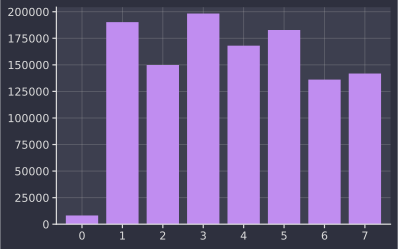

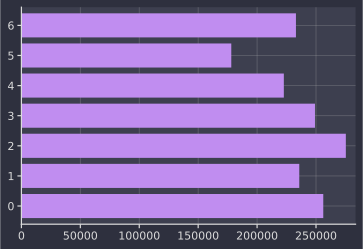

In [19]:
chA_raw = []
for chA in chA_list:
    counts = []
    for chB in chB_list:
        try:
            counts.append(data_set[chA][chB]['count_data'][0])
        except:
            pass
    chA_raw.append(np.average(np.array(counts)))
print(chA_raw)

print("################################################")
print("################################################")
chB_raw = []
for chB in chB_list:
    counts = []
    for chA in chA_list:
        try:
            counts.append(data_set[chA][chB]['count_data'][1])
        except:
            pass
    print(counts)
    chB_raw.append(np.average(np.array(counts)))
chB_raw = np.array(chB_raw)
chA_raw = np.array(chA_raw)
plt.figure()
plt.bar(np.arange(len(chA_raw)), chA_raw)
plt.figure()
plt.barh(np.arange(len(chB_raw)), chB_raw)

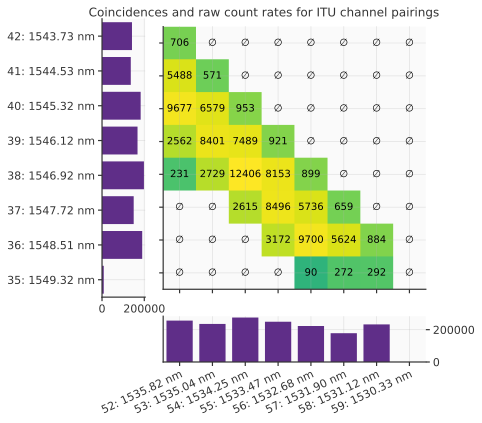

In [20]:
viz.update_colors()

fig = plt.figure(figsize = (5,5.3))

b1 = 0.05
b2 = 0.05
tw = 0.12
width = 1 - 2*b1 - b2 - tw

main_size = [b1 + b2 + tw, b1 + b2 + tw, width, width]
left_bar = [b1, b1 + tw + b2, tw, width]
bottom_bar = [b1 + tw + b2, b1, width, tw]


ax_left_bar = fig.add_axes(left_bar)
ax_bottom_bar = fig.add_axes(bottom_bar)
ax_main = fig.add_axes(main_size, sharex=ax_bottom_bar, sharey=ax_left_bar)
# setp(ax_main, xticklabels=[])
# ax_bottom_bar.set_xscale('log')
# ax_bottom_bar.grid(which='minor')
# ax_main.grid(which='minor')
ax_main.tick_params('x', labelbottom=False)
ax_main.tick_params('y', labelleft=False)


ax_left_bar.set_yticks(np.arange(len(chA_list)))
ax_bottom_bar.set_xticks(np.arange(len(chB_list)))

ax_left_bar.set_yticklabels(chA_list_str[::-1])
ax_bottom_bar.set_xticklabels(chB_list_str)
plt.setp(ax_bottom_bar.get_xticklabels(), rotation=25, ha="right",
         rotation_mode="anchor")
ax_left_bar.barh(np.arange(len(chA_raw)), chA_raw[::-1])
ax_bottom_bar.bar(np.arange(len(chB_raw)), chB_raw)
ax_bottom_bar.yaxis.tick_right()

Set_rot = np.rot90(np.array(Set))
ax_main.imshow(Set_rot,norm=colors.LogNorm(vmin=.01, vmax=np.max(Set)))

for i in range(len(chA_list)):
    for j in range(len(chB_list)):
        if Set_rot[i][j] == 0:
            label = '∅'
        else:
            label = Set_rot[i][j]
        text = ax_main.text(j, i, label,
                       ha="center", va="center", 
                       color="black")
fig.suptitle('Coincidences and raw count rates for ITU channel pairings')
plt.savefig("8nm_jsi_light.svg")

### Raw count rates shown with purple bars
#### Coincidences per second shown in the main figure
#### Measured with 2.0 Amps set on the SHG/EDFA. It can go up to 3.5 Amps